#  Netflix EDA Project

## 1. Import Libraries & Dataset


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflix_titles.csv.zip")

In [2]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 2. Data Cleaning
- Convert `date_added` to datetime  
- Fill missing values  
- Drop unnecessary nulls  
- Extract `year_added` and `month_added`  
- Clean `duration` column  


In [3]:
df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip() , format = 'mixed')
df = df.dropna(subset = ['rating'])
df = df.fillna({'director':'Unknown', 'cast':'Unknown', 'country':'Unknown'})

In [8]:
df = df.dropna(subset='date_added')
df = df.dropna(subset = 'duration')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [10]:
directors_top = df['director'].str.split(', ')
directors_top = [d.strip().lower() for sublist in directors_top for d in sublist]
director_count = pd.Series(directors_top).value_counts().head(10)

In [11]:
countries = df['country'].dropna().str.split(', ')
all_countries = [c.strip().lower() for sublist in countries for c in sublist]
all_countries = pd.Series(all_countries).value_counts().head(10)
df['listed_in'] = df['listed_in'].str.lower().str.strip()
df['rating'] = df['rating'].str.strip()

In [12]:
df['Year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

In [13]:
all_genres = df['listed_in'].dropna().str.split(', ')
all_genres = [g.strip().lower() for sublist in all_genres for g in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)

In [14]:
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

In [15]:
movies['duration'] = movies['duration'].str.replace(' min','').astype(float)
tv_shows['duration'] = tv_shows['duration'].str.replace(' Season','').str.replace('s','').astype(int)

In [16]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"dramas, independent movies, international movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"comedies, dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"dramas, international movies",After most of her family is murdered in a terr...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96.0,"dramas, international movies, thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"cult movies, dramas, thrillers","A political cartoonist, a crime reporter and a...",2019,11
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"comedies, horror movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"children & family movies, comedies","Dragged from civilian life, a former superhero...",2020,1


In [17]:
tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,month
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"docuseries, reality tv","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"international tv shows, romantic tv shows, tv ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1,"tv dramas, tv horror, tv mysteries",The arrival of a charismatic young priest brin...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2,"anime series, kids' tv",Now that he's discovered the Pendulum Summonin...,2018,5
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2,"international tv shows, tv dramas","During the Mongol invasions, Yunus Emre leaves...",2017,1
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3,kids' tv,Teen surfer Zak Storm is mysteriously transpor...,2018,9
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1,"international tv shows, romantic tv shows, tv ...","Strong-willed, middle-class Kashaf and carefre...",2016,12


In [18]:
movies['country'].unique()

array(['United States', 'Unknown',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'Germany, Czech Republic', 'India', 'United States, India, France',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Japan', 'Nigeria',
       'Spain, United States', 'France', 'United Kingdom, United States',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada', 'Hong Kong', 'United States, China, Hong Kong',
       'Italy, United States', 'United States, Germany',
       'United Kingdom, Canada, United States',
       'U

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6126 non-null   object        
 1   type          6126 non-null   object        
 2   title         6126 non-null   object        
 3   director      6126 non-null   object        
 4   cast          6126 non-null   object        
 5   country       6126 non-null   object        
 6   date_added    6126 non-null   datetime64[ns]
 7   release_year  6126 non-null   int64         
 8   rating        6126 non-null   object        
 9   duration      6126 non-null   float64       
 10  listed_in     6126 non-null   object        
 11  description   6126 non-null   object        
 12  Year          6126 non-null   int32         
 13  month         6126 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(9)
memory usage: 670.0+ KB


In [20]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2664 entries, 1 to 8803
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2664 non-null   object        
 1   type          2664 non-null   object        
 2   title         2664 non-null   object        
 3   director      2664 non-null   object        
 4   cast          2664 non-null   object        
 5   country       2664 non-null   object        
 6   date_added    2664 non-null   datetime64[ns]
 7   release_year  2664 non-null   int64         
 8   rating        2664 non-null   object        
 9   duration      2664 non-null   int64         
 10  listed_in     2664 non-null   object        
 11  description   2664 non-null   object        
 12  Year          2664 non-null   int32         
 13  month         2664 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(9)
memory usage: 291.4+ KB


In [21]:
movies = movies.dropna()
movies['duration'].mean()

np.float64(99.58488410055502)

In [22]:
tv_shows['duration'].mean().round()

np.float64(2.0)

In [23]:
movies['rating'].value_counts()
movies['duration'].describe()

count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [24]:
tv_shows = tv_shows.dropna()
tv_rating = tv_shows['rating'].value_counts().head(7)
movies_rating = movies['rating'].value_counts().head(7)

In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6126 non-null   object        
 1   type          6126 non-null   object        
 2   title         6126 non-null   object        
 3   director      6126 non-null   object        
 4   cast          6126 non-null   object        
 5   country       6126 non-null   object        
 6   date_added    6126 non-null   datetime64[ns]
 7   release_year  6126 non-null   int64         
 8   rating        6126 non-null   object        
 9   duration      6126 non-null   float64       
 10  listed_in     6126 non-null   object        
 11  description   6126 non-null   object        
 12  Year          6126 non-null   int32         
 13  month         6126 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(9)
memory usage: 670.0+ KB


In [26]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2664 entries, 1 to 8803
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2664 non-null   object        
 1   type          2664 non-null   object        
 2   title         2664 non-null   object        
 3   director      2664 non-null   object        
 4   cast          2664 non-null   object        
 5   country       2664 non-null   object        
 6   date_added    2664 non-null   datetime64[ns]
 7   release_year  2664 non-null   int64         
 8   rating        2664 non-null   object        
 9   duration      2664 non-null   int64         
 10  listed_in     2664 non-null   object        
 11  description   2664 non-null   object        
 12  Year          2664 non-null   int32         
 13  month         2664 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(9)
memory usage: 291.4+ KB


In [27]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"dramas, independent movies, international movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"comedies, dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"dramas, international movies",After most of her family is murdered in a terr...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96.0,"dramas, international movies, thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"cult movies, dramas, thrillers","A political cartoonist, a crime reporter and a...",2019,11
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"comedies, horror movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"children & family movies, comedies","Dragged from civilian life, a former superhero...",2020,1


In [28]:
tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,month
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"docuseries, reality tv","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"international tv shows, romantic tv shows, tv ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1,"tv dramas, tv horror, tv mysteries",The arrival of a charismatic young priest brin...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2,"anime series, kids' tv",Now that he's discovered the Pendulum Summonin...,2018,5
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2,"international tv shows, tv dramas","During the Mongol invasions, Yunus Emre leaves...",2017,1
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3,kids' tv,Teen surfer Zak Storm is mysteriously transpor...,2018,9
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1,"international tv shows, romantic tv shows, tv ...","Strong-willed, middle-class Kashaf and carefre...",2016,12


In [29]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"docuseries, reality tv","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"international tv shows, romantic tv shows, tv ...",In a city of coaching centers known to train I...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"cult movies, dramas, thrillers","A political cartoonist, a crime reporter and a...",2019,11
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"kids' tv, korean tv shows, tv comedies","While living alone in a spooky town, a young g...",2019,7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"comedies, horror movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"children & family movies, comedies","Dragged from civilian life, a former superhero...",2020,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  Year          8790 non-null   int32         
 13  month         8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 961.4+ KB


#  Exploratory Data Analysis (EDA)

In this section, we explore Netflix content using different visualizations to understand trends, patterns, and insights.



##  Movies vs TV Shows Added by Year

This chart shows how many **Movies** and **TV Shows** were added to Netflix each year.
It helps us identify the overall growth trend and compare the contribution of each type.


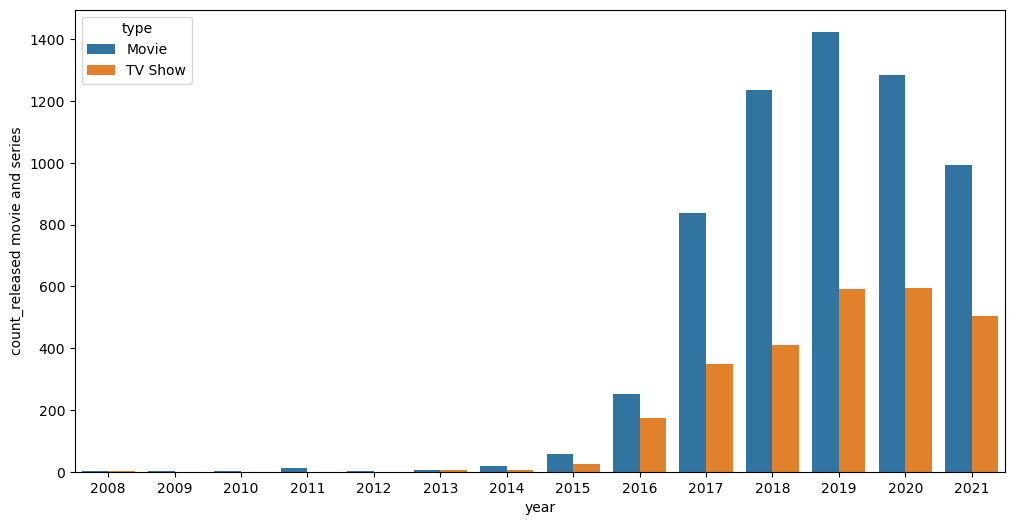

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data = df , x = 'Year' , hue = 'type')
plt.xlabel("year")
plt.ylabel("count_released movie and series")
plt.show()

###  Observation
- Netflix content started growing significantly after **2015**.  
- **Movies dominate** the catalog compared to TV Shows.  
- There is a sharp rise in both categories around **2018–2020**.  


## Content Added by Month

This chart shows how many **Movies** and **TV Shows** were added to Netflix across different months of the year.  
It helps us check if there are any seasonal trends in Netflix content additions.


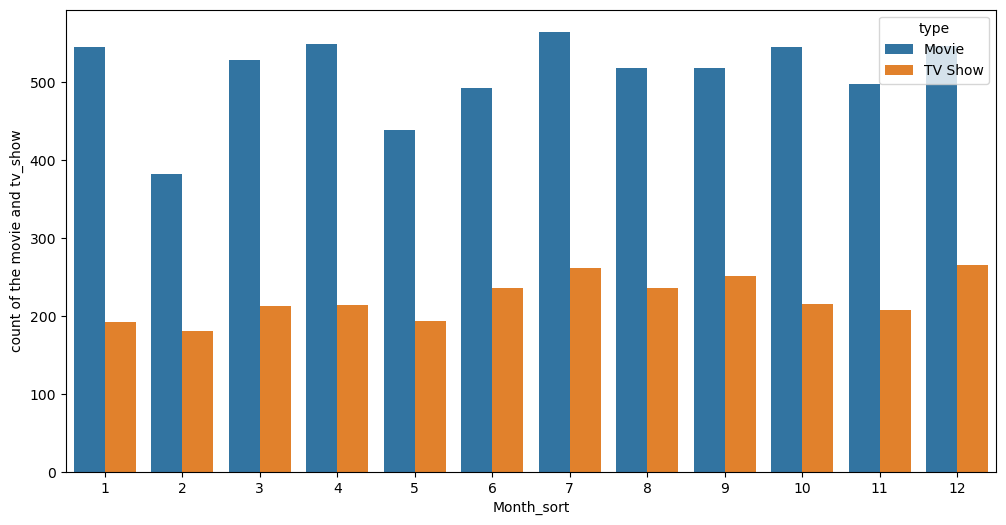

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'month' , data = df , hue = 'type')
plt.xlabel('Month_sort')
plt.ylabel('count of the movie and tv_show')
plt.show()

### Observation
- Netflix adds content **consistently across all months**, but there may be **slight peaks** in certain months.  
- **Movies are generally added more than TV Shows** in each month.  
- Seasonal trends (if any) are not very strong in this dataset.  


##  Ratings Distribution: Movies vs TV Shows

This pair of pie charts shows the **ratings distribution** for Movies and TV Shows on Netflix.  
The exploded slice highlights the **most common rating** in each category.


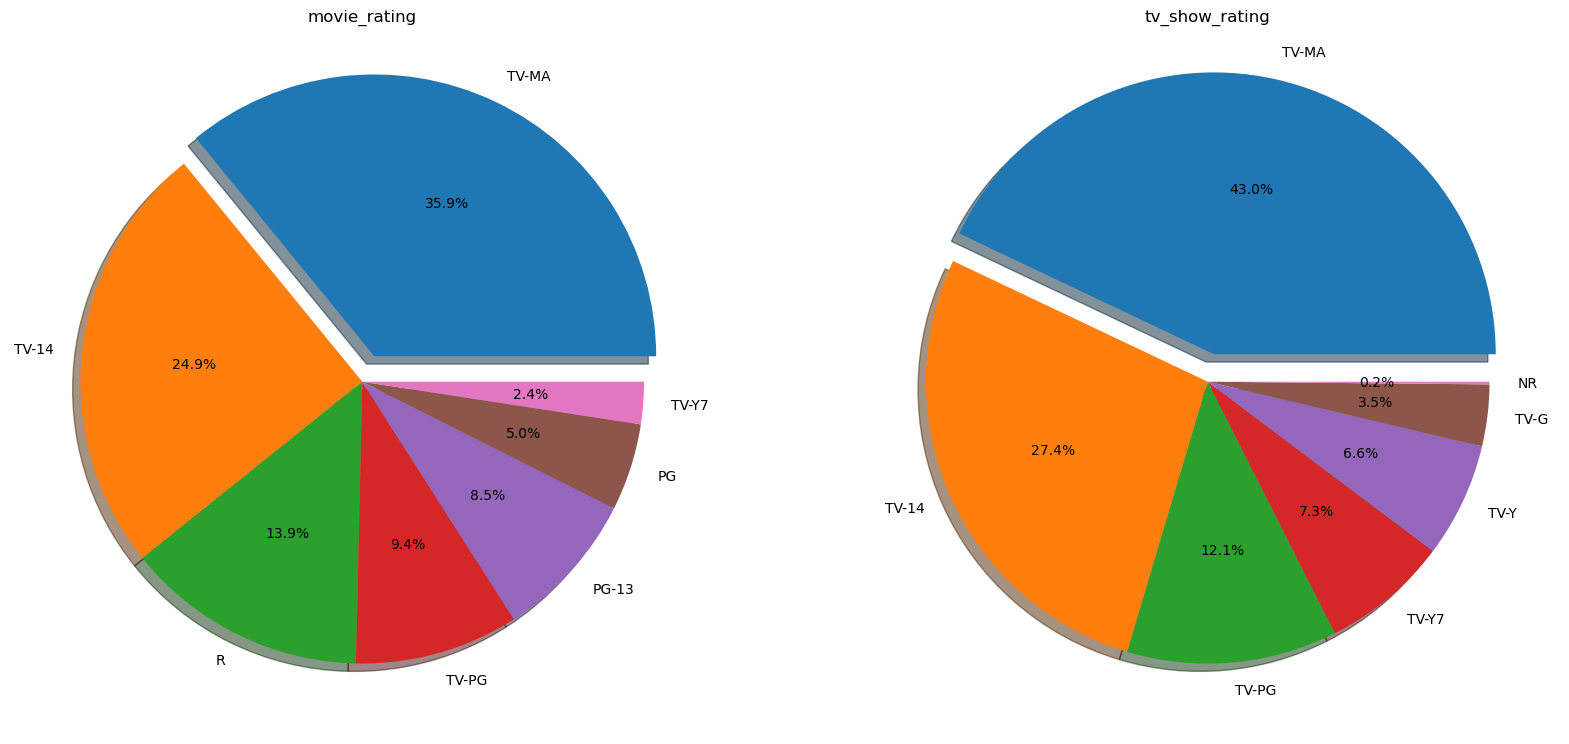

In [33]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
explode = [0.1 if value == movies_rating.max() else 0 for value in movies_rating]
plt.pie( movies_rating , autopct = '%1.1f%%' , shadow = True , labels = movies_rating.index , explode=explode)
plt.title('movie_rating')
plt.subplot(1,2,2)
explode = [0.1 if value == tv_rating.max() else 0 for value in tv_rating]
plt.pie( tv_rating , autopct = '%1.1f%%' , shadow = True , labels = tv_rating.index , explode=explode)
plt.title('tv_show_rating')
plt.show()

### Observation
- For **Movies**, the most frequent rating is **R or TV-MA**, showing a focus on mature content.  
- For **TV Shows**, the dominant rating is **TV-MA**, highlighting adult-oriented programming.  
- Very few titles fall into family/kids categories compared to mature/adult categories.  


## Preparing Data for Heatmap

Before creating the heatmap, we use a **pivot table** to restructure the dataset.  
This table shows the **number of titles added** to Netflix for each combination of **Year** (rows) and **Month** (columns).  
Missing values are filled with 0 to avoid gaps in visualization.

In [34]:
heatmap_data = df.pivot_table(index='Year', 
                              columns='month', 
                              values='title', 
                              aggfunc='count').fillna(0)

## Heatmap of Netflix Content Added by Year and Month

This heatmap shows how many **Movies and TV Shows** were added to Netflix in each **Year × Month** combination.  
It helps us identify growth patterns and seasonal peaks in content addition.

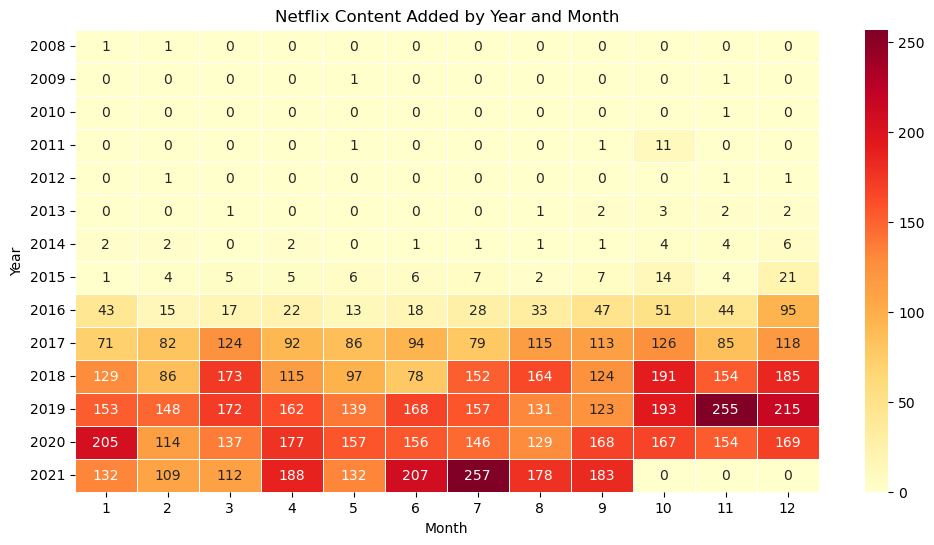

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, annot=True, fmt='.0f')
plt.title("Netflix Content Added by Year and Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

###  Observation
- Netflix saw a **major increase in content additions after 2015**.  
- Certain years (e.g., 2018–2020) show a **very high concentration of titles**, reflecting Netflix’s global expansion.  
- Content is added fairly evenly across months, with **no strong seasonal spikes**, though some months are slightly higher than others.  

## Growth of Netflix Content Over the Years

To analyze Netflix’s expansion, we calculate the **number of titles added each year**.  
We also compute the **growth rate (%)** compared to the previous year using `pct_change()`.


In [36]:
growth = df.groupby('Year')['title'].count().reset_index()
growth.rename(columns={'title':'count'}, inplace=True)

growth['growth_rate'] = growth['count'].pct_change() * 100

##  Netflix Growth Trend Over the Years

This line chart shows two key metrics:
- **Total Content** → the number of Movies and TV Shows added each year.  
- **Growth Rate (%)** → the percentage increase compared to the previous year.  

It highlights Netflix’s rapid expansion phase and the years when growth slowed down.


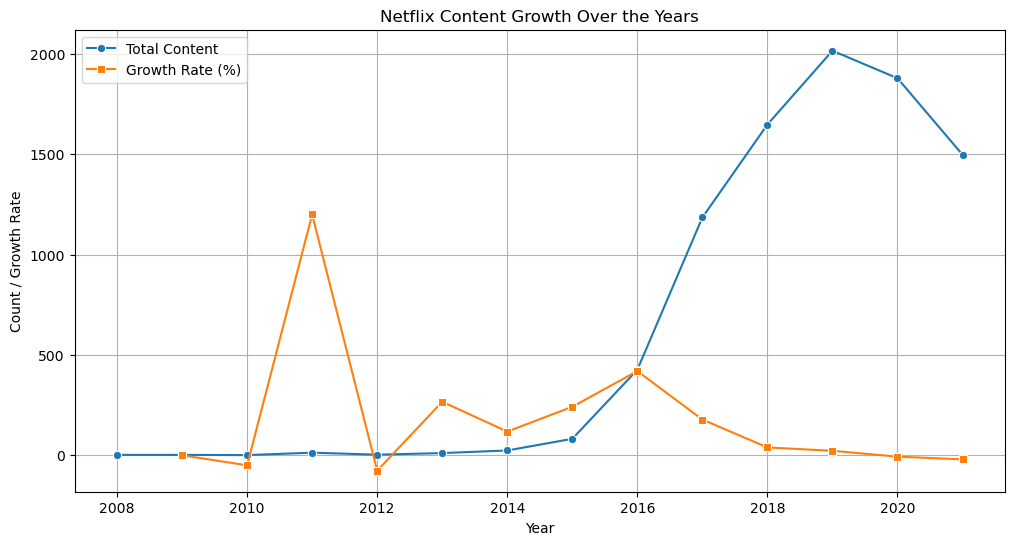

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='count', data=growth, marker='o', label="Total Content")
sns.lineplot(x='Year', y='growth_rate', data=growth, marker='s', label="Growth Rate (%)")
plt.title("Netflix Content Growth Over the Years")
plt.xlabel("Year")
plt.ylabel("Count / Growth Rate")
plt.legend()
plt.grid(True)
plt.show()

### Observation
- Netflix content **grew steadily until 2015**, after which it **skyrocketed**.  
- The **peak growth years were 2016–2020**, reflecting Netflix’s aggressive global expansion.  
- After 2020, the growth rate slowed, showing Netflix may have reached a more stable pace of content addition.  


## Top 10 Genres on Netflix

This bar chart shows the **Top 10 most common genres** on Netflix, based on the `listed_in` column.  
It gives us insights into the type of content Netflix prioritizes for its audience.


C:\Users\Dell\AppData\Local\Temp\ipykernel_12296\515755446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


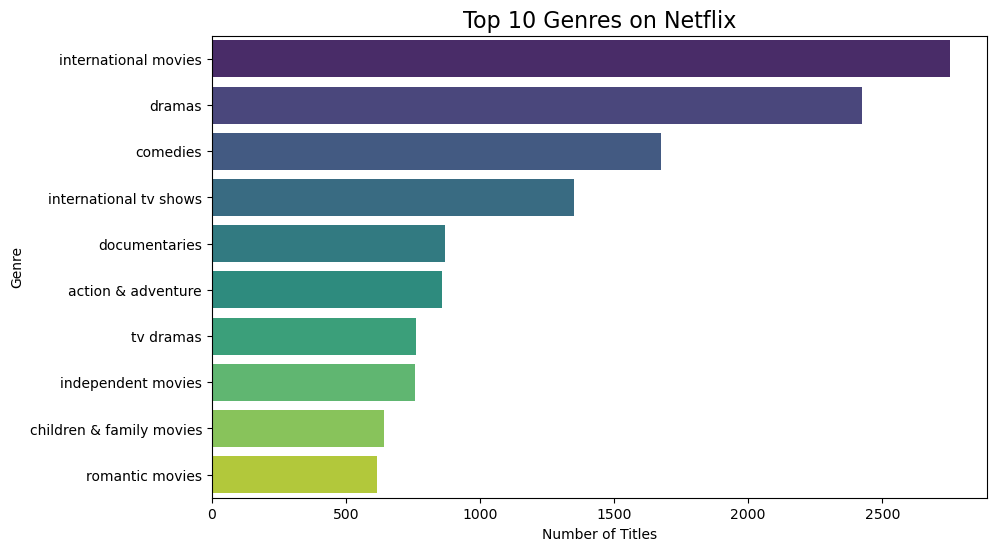

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 10 Genres on Netflix", fontsize=16)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

### Observation
- **Dramas, Documentaries, and Comedies** are the most frequent genres on Netflix.  
- Genres like **International Movies** and **Action & Adventure** also have a strong presence.  
- Family-oriented genres are much less common compared to drama-heavy and adult-focused content.  


## Top 10 Directors on Netflix

The `director` column often contains missing values, so we replaced them with `"Unknown"`.  
To get meaningful insights, we exclude `"Unknown"` and identify the **Top 10 directors** with the most titles on Netflix.


In [39]:
director_count = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

## Top 10 Directors on Netflix

This chart shows the **Top 10 directors** on Netflix (excluding `"Unknown"` values).  
It highlights which directors have the most titles available on the platform.


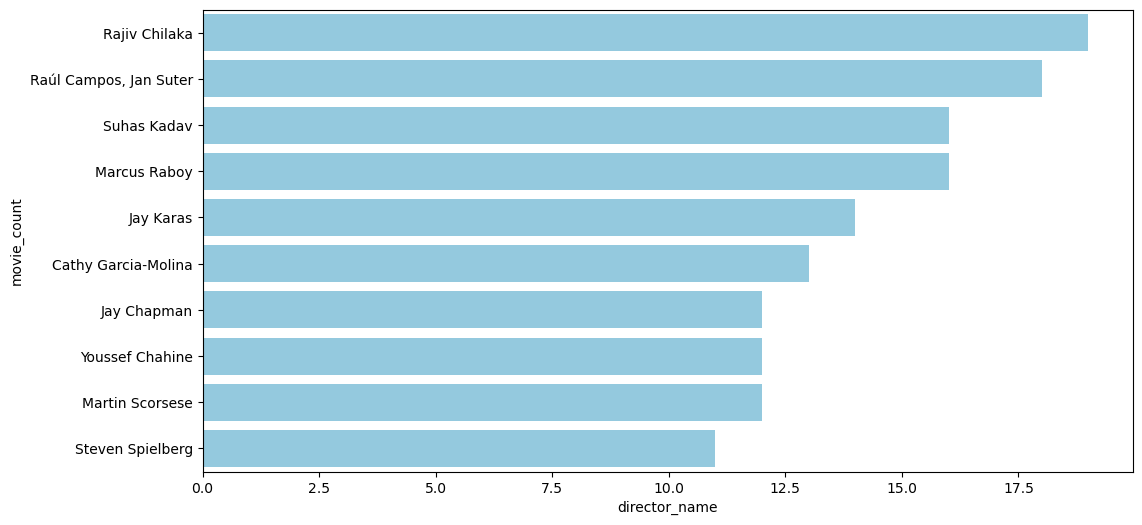

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x = director_count.values , y =  director_count.index  , color = 'skyblue')
plt.xlabel('director_name')
plt.ylabel('movie_count')
plt.show()

###  Observation
- *Raúl Campos* and *Jan Suter* lead the list, mostly known for directing comedy specials.  
- Other directors in the Top 10 have only a small share, showing that Netflix collaborates with a **wide variety of directors** rather than focusing heavily on just a few.  


## Distribution of Movie Durations

This histogram shows the **distribution of movie durations (in minutes)** on Netflix.  
It helps us understand the typical length of movies available on the platform.

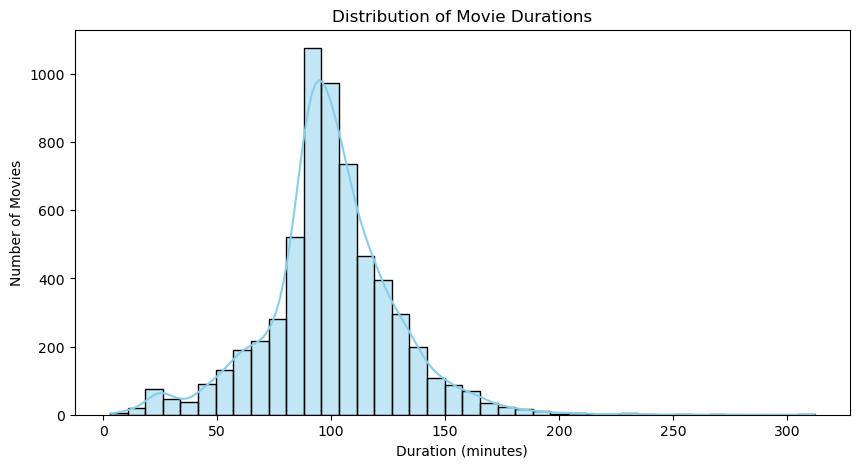

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(movies['duration'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

### Observation
- Most Netflix movies are between **90–120 minutes long**, which aligns with standard movie lengths.  
- A small number of very short and very long movies exist, but they are outliers.  
- The distribution is **slightly right-skewed**, showing more shorter movies than very long ones.  

## TV Show Seasons Distribution

This countplot shows the **number of seasons** for TV Shows on Netflix.  
It helps us see whether Netflix prefers short series or long-running shows.


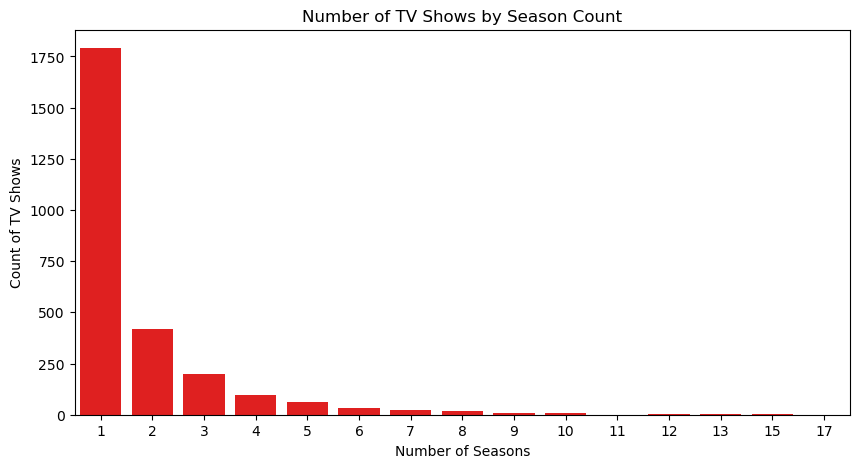

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='duration', data=tv_shows , color = 'red')
plt.title("Number of TV Shows by Season Count")
plt.xlabel("Number of Seasons")
plt.ylabel("Count of TV Shows")
plt.show()

###  Observation
- The majority of Netflix TV Shows have **1 or 2 seasons**, suggesting Netflix invests more in **short or limited series**.  
- Very few shows run beyond 5 seasons, indicating that long-running series are relatively rare on the platform.  
- This aligns with Netflix’s strategy of producing many **mini-series and original short runs** rather than extremely long shows.  
